In [26]:
import numpy as np
import pandas as pd
import glob
import sys
import matplotlib.pyplot as plt
import seaborn as sns

# loading some functions we wrote before
sys.path.append("/Users/jonathanramos/Desktop/LRI/Image ROI Data Wrangling/")
from clean import *
from norm import *
from count import *

In [2]:
df = pd.read_csv('RAM-12,13,14_FINAL.csv')
df_redo = pd.read_csv('RAM-REDO_FINAL.csv')

set(df.columns) - set(df_redo.columns)

{'CoM_x',
 'CoM_y',
 'dox',
 'grouping',
 'iid_rid',
 'mean_intensity',
 'rat_n',
 'react',
 'treatment'}

# Adding labels to redo set

In [6]:
# load in key, standardize cols and labels
df_key = pd.read_csv('RAM Ensembles Complete Cohort Key.csv')
df_key['Group'] = df_key.Group.replace('RAM-14_a', 'RAM-14a').replace('RAM-14_b', 'RAM-14b')
df_key['rat_n'] = df_key.apply(lambda x: '_'.join([x['Group'], str(x['Rat ID'])]), axis=1)
df_key['treatment'] = df_key['ABC/Veh'].str.upper()
df_key['dox'] = df_key['Dox Tx'].str.replace(' ', '_').str.upper()
df_key['react'] = df_key['React'].str.upper()

# select out the cols we are interested in
df_key = df_key[['rat_n', 'react', 'treatment', 'dox']]

### add missing rat information; this was confirmed by AG
df_key.loc[-1] = ['RAM-13_7', 'NR', 'ABC', 'OFF_DOX']
df_key.index = df_key.index + 1
df_key = df_key.sort_index()


def get_cols(df, df_key):
    # parse filename to build rat_n, image_name
    df['rat_n'] = df.filename.str.split('_').apply(lambda x: '_'.join(x[:2]))

    # merge with key on rat_n
    df = df.merge(df_key, how='left', on='rat_n')

    return df

df_redo = get_cols(df_redo, df_key)
df_redo = df_redo.rename(columns={'xm': 'CoM_x', 'ym': 'CoM_y', 'mean': 'mean_intensity', 'roi_id':'iid_rid', 'roi_id.1': 'roi_id'})

# Concat full set and redo set

In [7]:
df = df[['iid_rid', 'dummy_cFos', 'dummy_EGFP', 'dummy_mKate',
    'image_name', 'roi_id', 'stain', 'CoM_x', 'CoM_y', 'background',
    'mean_intensity', 'filename', 'rat_n', 'react', 'treatment', 'dox',
    'true_grouping']]

df_redo = df_redo[['iid_rid', 'dummy_cFos', 'dummy_EGFP', 'dummy_mKate',
    'image_name', 'roi_id', 'stain', 'CoM_x', 'CoM_y', 'background',
    'mean_intensity', 'filename', 'rat_n', 'react', 'treatment', 'dox',
    'true_grouping']]


df_full = pd.concat([df, df_redo])
print(f'shape: {df_full.shape}')

duplicates = df_full.duplicated(subset=['CoM_x', 'CoM_y', 'roi_id', 'image_name', 'mean_intensity', 'background']).sum()
print(f'\nduplicates: {duplicates}')

print('\nNaNs per col:')
print(df_full.isna().sum())
df_full.head()

shape: (43483, 17)

duplicates: 0

NaNs per col:
iid_rid            0
dummy_cFos         0
dummy_EGFP         0
dummy_mKate        0
image_name         0
roi_id             0
stain              0
CoM_x             31
CoM_y             31
background         0
mean_intensity    31
filename           0
rat_n              0
react              0
treatment          0
dox                0
true_grouping      0
dtype: int64


,iid_rid,dummy_cFos,dummy_EGFP,dummy_mKate,image_name,roi_id,stain,CoM_x,CoM_y,background,mean_intensity,filename,rat_n,react,treatment,dox,true_grouping
0,RAM-12_11_PFC_3.5_A_0-002-00000_mKate,False,True,True,RAM-12_11_PFC_3.5_A,0-002-00000_mKate,mKate,490.69,263.66,54.2523,130.8234,RAM-12_11_PFC_3.5_A_4.tif,RAM-12_11,VR5,ABC,OFF_DOX,"('0-01c-00028_EGFP', '0-002-00000_mKate')"
1,RAM-12_11_PFC_3.5_A_0-002-00001_mKate,False,False,True,RAM-12_11_PFC_3.5_A,0-002-00001_mKate,mKate,359.15,417.22,54.2523,252.4054,RAM-12_11_PFC_3.5_A_4.tif,RAM-12_11,VR5,ABC,OFF_DOX,"('0-002-00001_mKate',)"
2,RAM-12_11_PFC_3.5_A_0-002-00002_mKate,False,True,True,RAM-12_11_PFC_3.5_A,0-002-00002_mKate,mKate,149.95,354.17,54.2523,910.3442,RAM-12_11_PFC_3.5_A_4.tif,RAM-12_11,VR5,ABC,OFF_DOX,"('0-01c-00047_EGFP', '0-002-00002_mKate')"
3,RAM-12_11_PFC_3.5_A_0-002-00003_mKate,False,True,True,RAM-12_11_PFC_3.5_A,0-002-00003_mKate,mKate,193.05,160.84,54.2523,280.5944,RAM-12_11_PFC_3.5_A_4.tif,RAM-12_11,VR5,ABC,OFF_DOX,"('0-01c-00128_EGFP', '0-002-00003_mKate')"
4,RAM-12_11_PFC_3.5_A_0-002-00004_mKate,False,True,True,RAM-12_11_PFC_3.5_A,0-002-00004_mKate,mKate,221.09,254.73,54.2523,237.5106,RAM-12_11_PFC_3.5_A_4.tif,RAM-12_11,VR5,ABC,OFF_DOX,"('0-FFF-00238_EGFP', '0-002-00004_mKate')"


In [8]:
# dropping those 31 rows containing nans
df_full = df_full.dropna()
print(f'shape: {df_full.shape}')

shape: (43452, 17)


In [10]:
# drop two on dox animals with weird images
df_full = df_full[df_full.rat_n != 'RAM-13_3']
df_full = df_full[df_full.rat_n != 'RAM-14a_3']
df_full = df_full[df_full.rat_n != 'RAM-14b_7']
df_full = df_full.copy(deep=True)
print(f'shape: {df_full.shape}')

shape: (36414, 19)


## compute normalized mean-background

In [12]:
df_full['mean-background'] = df_full.mean_intensity - df_full.background
norm_condition = df_full.query('dox == "OFF_DOX" and react == "FR1" and treatment == "ABC"')['mean-background'].mean()
df_full['norm_mean-background'] = df_full['mean-background'] / norm_condition

df_full

,iid_rid,dummy_cFos,dummy_EGFP,dummy_mKate,image_name,roi_id,stain,CoM_x,CoM_y,background,mean_intensity,filename,rat_n,react,treatment,dox,true_grouping,mean-background,norm_mean-background
0,RAM-12_11_PFC_3.5_A_0-002-00000_mKate,False,True,True,RAM-12_11_PFC_3.5_A,0-002-00000_mKate,mKate,490.690,263.660,54.2523,130.8234,RAM-12_11_PFC_3.5_A_4.tif,RAM-12_11,VR5,ABC,OFF_DOX,"('0-01c-00028_EGFP', '0-002-00000_mKate')",76.5711,0.320746
1,RAM-12_11_PFC_3.5_A_0-002-00001_mKate,False,False,True,RAM-12_11_PFC_3.5_A,0-002-00001_mKate,mKate,359.150,417.220,54.2523,252.4054,RAM-12_11_PFC_3.5_A_4.tif,RAM-12_11,VR5,ABC,OFF_DOX,"('0-002-00001_mKate',)",198.1531,0.830036
2,RAM-12_11_PFC_3.5_A_0-002-00002_mKate,False,True,True,RAM-12_11_PFC_3.5_A,0-002-00002_mKate,mKate,149.950,354.170,54.2523,910.3442,RAM-12_11_PFC_3.5_A_4.tif,RAM-12_11,VR5,ABC,OFF_DOX,"('0-01c-00047_EGFP', '0-002-00002_mKate')",856.0919,3.586050
3,RAM-12_11_PFC_3.5_A_0-002-00003_mKate,False,True,True,RAM-12_11_PFC_3.5_A,0-002-00003_mKate,mKate,193.050,160.840,54.2523,280.5944,RAM-12_11_PFC_3.5_A_4.tif,RAM-12_11,VR5,ABC,OFF_DOX,"('0-01c-00128_EGFP', '0-002-00003_mKate')",226.3421,0.948116
4,RAM-12_11_PFC_3.5_A_0-002-00004_mKate,False,True,True,RAM-12_11_PFC_3.5_A,0-002-00004_mKate,mKate,221.090,254.730,54.2523,237.5106,RAM-12_11_PFC_3.5_A_4.tif,RAM-12_11,VR5,ABC,OFF_DOX,"('0-FFF-00238_EGFP', '0-002-00004_mKate')",183.2583,0.767644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,RAM-12_14_PFC_4.0_B_mKate_45,False,False,True,RAM-12_14_PFC_4.0_B,RAM-12_14_PFC_4.0_B_mKate_45,mKate,126.038,396.117,19.5310,221.3070,RAM-12_14_PFC_4.0_B_4,RAM-12_14,NR,VEH,OFF_DOX,"('RAM-12_14_PFC_4.0_B_mKate_45',)",201.7760,0.845212
2226,RAM-12_14_PFC_4.0_B_mKate_46,False,True,True,RAM-12_14_PFC_4.0_B,RAM-12_14_PFC_4.0_B_mKate_46,mKate,20.795,385.174,19.5310,513.8450,RAM-12_14_PFC_4.0_B_4,RAM-12_14,NR,VEH,OFF_DOX,"('RAM-12_14_PFC_4.0_B_EGFP_300', 'RAM-12_14_PF...",494.3140,2.070613
2227,RAM-12_14_PFC_4.0_B_mKate_47,False,True,True,RAM-12_14_PFC_4.0_B,RAM-12_14_PFC_4.0_B_mKate_47,mKate,48.338,409.231,19.5310,82.0070,RAM-12_14_PFC_4.0_B_4,RAM-12_14,NR,VEH,OFF_DOX,"('RAM-12_14_PFC_4.0_B_EGFP_299', 'RAM-12_14_PF...",62.4760,0.261703
2228,RAM-12_14_PFC_4.0_B_mKate_48,False,False,True,RAM-12_14_PFC_4.0_B,RAM-12_14_PFC_4.0_B_mKate_48,mKate,79.833,159.605,19.5310,71.3380,RAM-12_14_PFC_4.0_B_4,RAM-12_14,NR,VEH,OFF_DOX,"('RAM-12_14_PFC_4.0_B_mKate_48',)",51.8070,0.217012


# Counting Mean Cell ns

In [8]:
df_img_ns = df_full.groupby('rat_n')['image_name'].unique().reset_index()
df_img_ns['n_imgs'] = df_img_ns.image_name.apply(len)
df_img_ns

,rat_n,image_name,n_imgs
0,RAM-12_11,"[RAM-12_11_PFC_3.5_A, RAM-12_11_PFC_3.7_B, RAM...",4
1,RAM-12_12,"[RAM-12_12_PFC_3.4_A, RAM-12_12_PFC_3.4_B, RAM...",4
2,RAM-12_13,"[RAM-12_13_PFC_3.7_B, RAM-12_13_PFC_3.7_C, RAM...",4
3,RAM-12_14,"[RAM-12_14_PFC_3.8_C, RAM-12_14_PFC_3.8_D, RAM...",4
4,RAM-12_16,"[RAM-12_16_PFC_3.7_D, RAM-12_16_PFC_4.0_A, RAM...",4
5,RAM-12_3,"[RAM-12_3_PFC_3.7_A, RAM-12_3_PFC_3.7_B, RAM-1...",4
6,RAM-12_6,"[RAM-12_6_PFC_3.5_A, RAM-12_6_PFC_3.5_B, RAM-1...",3
7,RAM-12_7,"[RAM-12_7_PFC_3.5_C, RAM-12_7_PFC_3.5_D, RAM-1...",4
8,RAM-13_1,"[RAM-13_1_PFC_3.5_C, RAM-13_1_PFC_3.5_D, RAM-1...",4
9,RAM-13_5,"[RAM-13_5_PFC_3.2_A, RAM-13_5_PFC_3.3_C, RAM-1...",4


## Single cFos, single mKate

In [9]:
def mean_cell_ns_single(stain_x):
    # series of groupby's and reductions to get sum of sums per rat
    # first groupby to count cells per image; second groupby to sum counts per rat
    # merge with df_full to get required labels, merge with df_img_ns to get n_imgs per rat
    q = df_full.query(f'dummy_{stain_x} == True and stain == "{stain_x}"')\
        .groupby('image_name')['rat_n'].count()\
        .reset_index().rename(columns={'rat_n':'count'})\
        .merge(df_full[['image_name', 'rat_n']], on='image_name', how='left')\
        .drop_duplicates()\
        .groupby('rat_n')['count'].sum().reset_index().rename(columns={'count':'sum'})\
        .merge(df_full[['rat_n', 'react', 'treatment', 'dox']],\
            on='rat_n', how='left')\
        .drop_duplicates().reset_index()\
        .merge(df_img_ns[['rat_n', 'n_imgs']], on='rat_n', how='left')

    # compute means
    q['mean_cell_n'] = q['sum'] / q['n_imgs']

    # sort by dox, then treatment, then react; reorder cols
    q = q.sort_values(by=['dox', 'treatment', 'react'])\
        [['rat_n', 'dox', 'treatment', 'react', 'sum', 'n_imgs', 'mean_cell_n']]\
        .reset_index().drop('index', axis=1)

    return q

# these should be identical, but i'm performing both queries for completeness
mean_cell_ns_single('cFos').to_csv('RAM-12,13,14_cFos_mean_cell_ns.csv')
mean_cell_ns_single('mKate').to_csv('RAM-12,13,14_mKate_mean_cell_ns.csv')

## cFos on mKate, mKate on cFos

In [10]:
def mean_cell_ns_double(stain_x, stain_y):
    # series of groupby's and reductions to get sum of sums per rat
    # first groupby to count cells per image; second groupby to sum counts per rat
    # merge with df_full to get required labels, merge with df_img_ns to get n_imgs per rat
    q = df_full.query(f'dummy_{stain_x} == True and dummy_{stain_y} == True and stain == "{stain_x}"')\
        .groupby('image_name')['rat_n'].count()\
        .reset_index().rename(columns={'rat_n':'count'})\
        .merge(df_full[['image_name', 'rat_n']], on='image_name', how='left')\
        .drop_duplicates()\
        .groupby('rat_n')['count'].sum().reset_index().rename(columns={'count':'sum'})\
        .merge(df_full[['rat_n', 'react', 'treatment', 'dox']],\
            on='rat_n', how='left')\
        .drop_duplicates().reset_index()\
        .merge(df_img_ns[['rat_n', 'n_imgs']], on='rat_n', how='left')

    # compute means
    q['mean_cell_n'] = q['sum'] / q['n_imgs']

    # sort by dox, then treatment, then react; reorder cols
    q = q.sort_values(by=['dox', 'treatment', 'react'])\
        [['rat_n', 'dox', 'treatment', 'react', 'sum', 'n_imgs', 'mean_cell_n']]\
        .reset_index().drop('index', axis=1)

    return q

# these should be identical, but i'm performing both queries for completeness
mean_cell_ns_double('cFos', 'mKate').to_csv('RAM-12,13,14_cFos_coloc_w_mKate_mean_cell_ns.csv')
mean_cell_ns_double('mKate', 'cFos').to_csv('RAM-12,13,14_mKate_coloc_w_cFos_mean_cell_ns.csv')

In [11]:
mean_cell_ns_double('cFos', 'mKate')

,rat_n,dox,treatment,react,sum,n_imgs,mean_cell_n
0,RAM-12_12,OFF_DOX,ABC,FR1,22,4,5.500000
1,RAM-14b_6,OFF_DOX,ABC,FR1,2,2,1.000000
2,RAM-14b_7,OFF_DOX,ABC,FR1,1,1,1.000000
3,RAM-14b_8,OFF_DOX,ABC,FR1,57,4,14.250000
4,RAM-13_7,OFF_DOX,ABC,NR,62,4,15.500000
5,RAM-14b_2,OFF_DOX,ABC,NR,62,4,15.500000
6,RAM-14b_4,OFF_DOX,ABC,NR,85,4,21.250000
7,RAM-12_11,OFF_DOX,ABC,VR5,9,4,2.250000
8,RAM-12_13,OFF_DOX,VEH,FR1,80,4,20.000000
9,RAM-13_8,OFF_DOX,VEH,FR1,85,5,17.000000


# Repeat cell ns, but this time with split by cFos intensity (median split)

## cFos_hi

In [12]:
df_cFos = df_full.query('dummy_cFos == True and stain =="cFos"').copy()
cFos_median = df_cFos['norm_mean-background'].median()
df_cFos['cFos_split'] = df_cFos['norm_mean-background'].apply(lambda x: 'cFos_hi' if x > cFos_median else 'cFos_lo')

q = df_cFos.query('cFos_split == "cFos_hi"')\
    .groupby(['cFos_split', 'image_name'])['rat_n'].count()\
    .reset_index().rename(columns={'rat_n':'count'})\
    .merge(df_cFos[['image_name','rat_n']], on='image_name', how='left')\
    .drop_duplicates()\
    .groupby(['rat_n', 'cFos_split'])['count'].sum().reset_index().rename(columns={'count':'sum'})\
    .merge(df_full[['rat_n', 'react', 'treatment', 'dox']],\
        on='rat_n', how='left')\
    .drop_duplicates().reset_index()\
    .merge(df_img_ns[['rat_n', 'n_imgs']], on='rat_n', how='left')

# compute means
q['mean_cell_n'] = q['sum'] / q['n_imgs']

# sort by dox, then treatment, then react; reorder cols
q = q.sort_values(by=['dox', 'treatment', 'react'])\
    [['rat_n', 'dox', 'treatment', 'react', 'cFos_split', 'sum', 'n_imgs', 'mean_cell_n']]\
    .reset_index().drop('index', axis=1)

q.to_csv('RAM-12,13,14_cFos_hi_mean_cell_ns.csv')
q

,rat_n,dox,treatment,react,cFos_split,sum,n_imgs,mean_cell_n
0,RAM-12_12,OFF_DOX,ABC,FR1,cFos_hi,256,4,64.000000
1,RAM-14b_6,OFF_DOX,ABC,FR1,cFos_hi,78,2,39.000000
2,RAM-14b_7,OFF_DOX,ABC,FR1,cFos_hi,62,1,62.000000
3,RAM-14b_8,OFF_DOX,ABC,FR1,cFos_hi,356,4,89.000000
4,RAM-13_7,OFF_DOX,ABC,NR,cFos_hi,472,4,118.000000
5,RAM-14b_2,OFF_DOX,ABC,NR,cFos_hi,504,4,126.000000
6,RAM-14b_4,OFF_DOX,ABC,NR,cFos_hi,772,4,193.000000
7,RAM-12_11,OFF_DOX,ABC,VR5,cFos_hi,90,4,22.500000
8,RAM-12_13,OFF_DOX,VEH,FR1,cFos_hi,293,4,73.250000
9,RAM-13_8,OFF_DOX,VEH,FR1,cFos_hi,307,5,61.400000


## cFos_lo

In [13]:
q = df_cFos.query('cFos_split == "cFos_lo"')\
    .groupby(['cFos_split', 'image_name'])['rat_n'].count()\
    .reset_index().rename(columns={'rat_n':'count'})\
    .merge(df_cFos[['image_name','rat_n']], on='image_name', how='left')\
    .drop_duplicates()\
    .groupby(['rat_n', 'cFos_split'])['count'].sum().reset_index().rename(columns={'count':'sum'})\
    .merge(df_full[['rat_n', 'react', 'treatment', 'dox']],\
        on='rat_n', how='left')\
    .drop_duplicates().reset_index()\
    .merge(df_img_ns[['rat_n', 'n_imgs']], on='rat_n', how='left')

# compute means
q['mean_cell_n'] = q['sum'] / q['n_imgs']

# sort by dox, then treatment, then react; reorder cols
q = q.sort_values(by=['dox', 'treatment', 'react'])\
    [['rat_n', 'dox', 'treatment', 'react', 'cFos_split', 'sum', 'n_imgs', 'mean_cell_n']]\
    .reset_index().drop('index', axis=1)

q.to_csv('RAM-12,13,14_cFos_lo_mean_cell_ns.csv')
q

,rat_n,dox,treatment,react,cFos_split,sum,n_imgs,mean_cell_n
0,RAM-12_12,OFF_DOX,ABC,FR1,cFos_lo,184,4,46.000000
1,RAM-14b_6,OFF_DOX,ABC,FR1,cFos_lo,118,2,59.000000
2,RAM-14b_7,OFF_DOX,ABC,FR1,cFos_lo,64,1,64.000000
3,RAM-14b_8,OFF_DOX,ABC,FR1,cFos_lo,404,4,101.000000
4,RAM-13_7,OFF_DOX,ABC,NR,cFos_lo,808,4,202.000000
5,RAM-14b_2,OFF_DOX,ABC,NR,cFos_lo,447,4,111.750000
6,RAM-14b_4,OFF_DOX,ABC,NR,cFos_lo,293,4,73.250000
7,RAM-12_11,OFF_DOX,ABC,VR5,cFos_lo,25,4,6.250000
8,RAM-12_13,OFF_DOX,VEH,FR1,cFos_lo,422,4,105.500000
9,RAM-13_8,OFF_DOX,VEH,FR1,cFos_lo,509,5,101.800000


In [14]:
q = df_cFos.query('cFos_split == "cFos_hi" and dummy_mKate == True')\
    .groupby(['cFos_split', 'image_name'])['rat_n'].count()\
    .reset_index().rename(columns={'rat_n':'count'})\
    .merge(df_cFos[['image_name','rat_n']], on='image_name', how='left')\
    .drop_duplicates()\
    .groupby(['rat_n', 'cFos_split'])['count'].sum().reset_index().rename(columns={'count':'sum'})\
    .merge(df_full[['rat_n', 'react', 'treatment', 'dox']],\
        on='rat_n', how='left')\
    .drop_duplicates().reset_index()\
    .merge(df_img_ns[['rat_n', 'n_imgs']], on='rat_n', how='left')

# compute means
q['mean_cell_n'] = q['sum'] / q['n_imgs']

# sort by dox, then treatment, then react; reorder cols
q = q.sort_values(by=['dox', 'treatment', 'react'])\
    [['rat_n', 'dox', 'treatment', 'react', 'cFos_split', 'sum', 'n_imgs', 'mean_cell_n']]\
    .reset_index().drop('index', axis=1)

# fill in rats who did not have this stain type combination with 0
missing = set(df_img_ns.rat_n) - set(q.rat_n)
df_missing = df_key[df_key.rat_n.isin(missing)].copy()
df_missing['cFos_split'] = 'cFos_hi'
df_missing['sum'] = 0
df_missing = df_missing.merge(df_img_ns[['rat_n', 'n_imgs']], on='rat_n', how='left')
df_missing['mean_cell_n'] = df_missing['sum'] / df_missing['n_imgs']
df_missing
q = pd.concat([q, df_missing]).sort_values(by=['dox', 'treatment', 'react']).reset_index().drop('index', axis=1)

q.to_csv('RAM-12,13,14_cFos_hi_coloc_w_mKate_mean_cell_ns.csv')
q

,rat_n,dox,treatment,react,cFos_split,sum,n_imgs,mean_cell_n
0,RAM-12_12,OFF_DOX,ABC,FR1,cFos_hi,16,4,4.000000
1,RAM-14b_6,OFF_DOX,ABC,FR1,cFos_hi,2,2,1.000000
2,RAM-14b_8,OFF_DOX,ABC,FR1,cFos_hi,31,4,7.750000
3,RAM-14b_7,OFF_DOX,ABC,FR1,cFos_hi,0,1,0.000000
4,RAM-13_7,OFF_DOX,ABC,NR,cFos_hi,39,4,9.750000
5,RAM-14b_2,OFF_DOX,ABC,NR,cFos_hi,44,4,11.000000
6,RAM-14b_4,OFF_DOX,ABC,NR,cFos_hi,73,4,18.250000
7,RAM-12_11,OFF_DOX,ABC,VR5,cFos_hi,6,4,1.500000
8,RAM-12_13,OFF_DOX,VEH,FR1,cFos_hi,38,4,9.500000
9,RAM-13_8,OFF_DOX,VEH,FR1,cFos_hi,36,5,7.200000


In [15]:
q = df_cFos.query('cFos_split == "cFos_lo" and dummy_mKate == True')\
    .groupby(['cFos_split', 'image_name'])['rat_n'].count()\
    .reset_index().rename(columns={'rat_n':'count'})\
    .merge(df_cFos[['image_name','rat_n']], on='image_name', how='left')\
    .drop_duplicates()\
    .groupby(['rat_n', 'cFos_split'])['count'].sum().reset_index().rename(columns={'count':'sum'})\
    .merge(df_full[['rat_n', 'react', 'treatment', 'dox']],\
        on='rat_n', how='left')\
    .drop_duplicates().reset_index()\
    .merge(df_img_ns[['rat_n', 'n_imgs']], on='rat_n', how='left')

# compute means
q['mean_cell_n'] = q['sum'] / q['n_imgs']

# sort by dox, then treatment, then react; reorder cols
q = q.sort_values(by=['dox', 'treatment', 'react'])\
    [['rat_n', 'dox', 'treatment', 'react', 'cFos_split', 'sum', 'n_imgs', 'mean_cell_n']]\
    .reset_index().drop('index', axis=1)

# fill in rats who did not have this stain type combination with 0
missing = set(df_img_ns.rat_n) - set(q.rat_n)
df_missing = df_key[df_key.rat_n.isin(missing)].copy()
df_missing['cFos_split'] = 'cFos_hi'
df_missing['sum'] = 0
df_missing = df_missing.merge(df_img_ns[['rat_n', 'n_imgs']], on='rat_n', how='left')
df_missing['mean_cell_n'] = df_missing['sum'] / df_missing['n_imgs']
df_missing
q = pd.concat([q, df_missing]).sort_values(by=['dox', 'treatment', 'react']).reset_index().drop('index', axis=1)

q.to_csv('RAM-12,13,14_cFos_lo_coloc_w_mKate_mean_cell_ns.csv')
q

,rat_n,dox,treatment,react,cFos_split,sum,n_imgs,mean_cell_n
0,RAM-12_12,OFF_DOX,ABC,FR1,cFos_lo,6,4,1.50
1,RAM-14b_7,OFF_DOX,ABC,FR1,cFos_lo,1,1,1.00
2,RAM-14b_8,OFF_DOX,ABC,FR1,cFos_lo,26,4,6.50
3,RAM-14b_6,OFF_DOX,ABC,FR1,cFos_hi,0,2,0.00
4,RAM-13_7,OFF_DOX,ABC,NR,cFos_lo,23,4,5.75
5,RAM-14b_2,OFF_DOX,ABC,NR,cFos_lo,18,4,4.50
6,RAM-14b_4,OFF_DOX,ABC,NR,cFos_lo,12,4,3.00
7,RAM-12_11,OFF_DOX,ABC,VR5,cFos_lo,3,4,0.75
8,RAM-12_13,OFF_DOX,VEH,FR1,cFos_lo,42,4,10.50
9,RAM-13_8,OFF_DOX,VEH,FR1,cFos_lo,49,5,9.80


<Axes: >

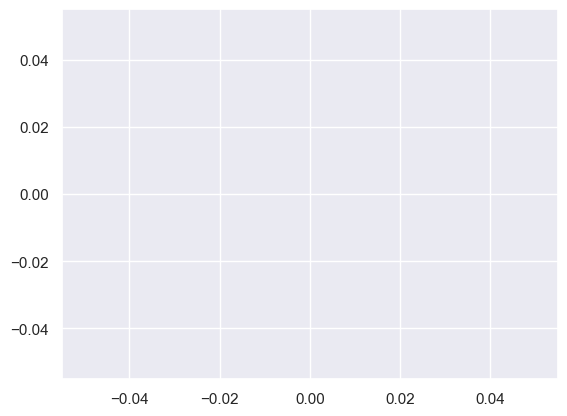

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
q = df_full.query('rat_n == "RAM-14a_3" and stain == "mKate"')['norm_mean-background']
sns.set_theme()
sns.histplot(q)

<Axes: xlabel='norm_mean-background', ylabel='Count'>

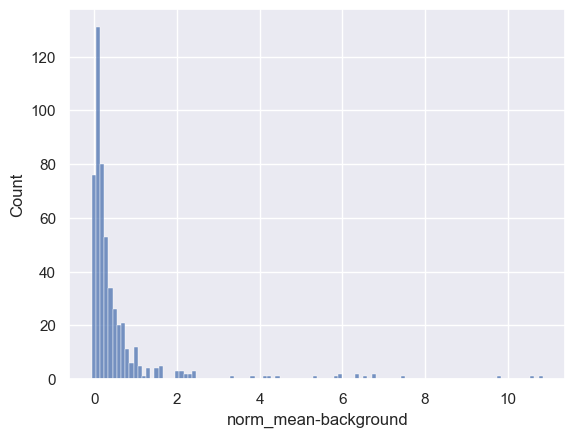

In [17]:
q = df_full.query('rat_n == "RAM-13_9" and stain == "mKate"')['norm_mean-background']
sns.histplot(q)

# TOTAL percent overlap

In [18]:
stain_x = 'mKate'
stain_y = 'cFos'

q_double = df_full.query(f'dummy_{stain_x} == True and dummy_{stain_y} == True and stain == "{stain_x}"')\
    .groupby('image_name')['roi_id'].count()\
    .reset_index().rename(columns={'roi_id':'count'})\
    .merge(df_full[['image_name', 'rat_n']], on='image_name', how='left')\
    .drop_duplicates().groupby('rat_n')['count'].sum().reset_index()

q_total = df_full.query(f'dummy_{stain_x} == True and stain == "{stain_x}"')\
    .groupby(['image_name','rat_n'])['roi_id'].count()\
    .reset_index().rename(columns={'roi_id':'total_count'})\
    .groupby('rat_n')['total_count'].sum().reset_index()

q = q_double.merge(q_total, on='rat_n', how='left')

q['percent'] = q['count'] / q['total_count'] * 100

q = q.groupby(['rat_n', 'count', 'total_count'])['percent'].sum().reset_index()\
    .merge(df_full[['rat_n', 'react', 'treatment', 'dox']],\
        on='rat_n', how='left')\
    .drop_duplicates().reset_index()

# sort by dox, then treatment, then react; reorder cols
q = q.sort_values(by=['dox', 'treatment', 'react'])\
    [['rat_n', 'dox', 'treatment', 'react', 'count', 'total_count', 'percent']]\
    .reset_index().drop('index', axis=1)

q.to_csv('RAM-12,13,14_TOTAL_mKate_percent_cFos_overlap.csv')
q

,rat_n,dox,treatment,react,count,total_count,percent
0,RAM-12_12,OFF_DOX,ABC,FR1,22,166,13.253012
1,RAM-14b_6,OFF_DOX,ABC,FR1,2,33,6.060606
2,RAM-14b_7,OFF_DOX,ABC,FR1,1,8,12.500000
3,RAM-14b_8,OFF_DOX,ABC,FR1,57,320,17.812500
4,RAM-13_7,OFF_DOX,ABC,NR,62,123,50.406504
5,RAM-14b_2,OFF_DOX,ABC,NR,62,365,16.986301
6,RAM-14b_4,OFF_DOX,ABC,NR,85,404,21.039604
7,RAM-12_11,OFF_DOX,ABC,VR5,9,237,3.797468
8,RAM-12_13,OFF_DOX,VEH,FR1,80,253,31.620553
9,RAM-13_8,OFF_DOX,VEH,FR1,85,306,27.777778


In [19]:
stain_x = 'mKate'
q_double = df_cFos.query('cFos_split == "cFos_hi" and dummy_mKate == True')\
    .groupby('image_name')['roi_id'].count()\
    .reset_index().rename(columns={'roi_id':'count'})\
    .merge(df_full[['image_name', 'rat_n']], on='image_name', how='left')\
    .drop_duplicates().groupby('rat_n')['count'].sum().reset_index()

q_total = df_full.query(f'dummy_{stain_x} == True and stain == "{stain_x}"')\
    .groupby(['image_name','rat_n'])['roi_id'].count()\
    .reset_index().rename(columns={'roi_id':'total_count'})\
    .groupby('rat_n')['total_count'].sum().reset_index()

q = q_double.merge(q_total, on='rat_n', how='left')

q['percent'] = q['count'] / q['total_count'] * 100

q = q.groupby(['rat_n', 'count', 'total_count'])['percent'].sum().reset_index()\
    .merge(df_full[['rat_n', 'react', 'treatment', 'dox']],\
        on='rat_n', how='left')\
    .drop_duplicates().reset_index()

# fill in rats who did not have observed stain type with 0
q = df_full[['rat_n','dox','treatment','react']].drop_duplicates().merge(q, on=['rat_n','dox','treatment','react'], how='left').fillna(0)

# sort by dox, then treatment, then react; reorder cols
q = q.sort_values(by=['dox', 'treatment', 'react'])\
    [['rat_n', 'dox', 'treatment', 'react', 'count', 'total_count', 'percent']]\
    .reset_index().drop('index', axis=1)

q.to_csv('RAM-12,13,14_TOTAL_mKate_percent_cFos_hi_overlap.csv')
q

,rat_n,dox,treatment,react,count,total_count,percent
0,RAM-12_12,OFF_DOX,ABC,FR1,16.0,166.0,9.638554
1,RAM-14b_6,OFF_DOX,ABC,FR1,2.0,33.0,6.060606
2,RAM-14b_7,OFF_DOX,ABC,FR1,0.0,0.0,0.000000
3,RAM-14b_8,OFF_DOX,ABC,FR1,31.0,320.0,9.687500
4,RAM-13_7,OFF_DOX,ABC,NR,39.0,123.0,31.707317
5,RAM-14b_2,OFF_DOX,ABC,NR,44.0,365.0,12.054795
6,RAM-14b_4,OFF_DOX,ABC,NR,73.0,404.0,18.069307
7,RAM-12_11,OFF_DOX,ABC,VR5,6.0,237.0,2.531646
8,RAM-12_13,OFF_DOX,VEH,FR1,38.0,253.0,15.019763
9,RAM-13_8,OFF_DOX,VEH,FR1,36.0,306.0,11.764706


In [20]:
stain_x = 'mKate'
q_double = df_cFos.query('cFos_split == "cFos_lo" and dummy_mKate == True')\
    .groupby('image_name')['roi_id'].count()\
    .reset_index().rename(columns={'roi_id':'count'})\
    .merge(df_full[['image_name', 'rat_n']], on='image_name', how='left')\
    .drop_duplicates().groupby('rat_n')['count'].sum().reset_index()

q_total = df_full.query(f'dummy_{stain_x} == True and stain == "{stain_x}"')\
    .groupby(['image_name','rat_n'])['roi_id'].count()\
    .reset_index().rename(columns={'roi_id':'total_count'})\
    .groupby('rat_n')['total_count'].sum().reset_index()

q = q_double.merge(q_total, on='rat_n', how='left')

q['percent'] = q['count'] / q['total_count'] * 100

q = q.groupby(['rat_n', 'count', 'total_count'])['percent'].sum().reset_index()\
    .merge(df_full[['rat_n', 'react', 'treatment', 'dox']],\
        on='rat_n', how='left')\
    .drop_duplicates().reset_index()

# fill in rats who did not have observed stain type with 0
q = df_full[['rat_n','dox','treatment','react']].drop_duplicates().merge(q, on=['rat_n','dox','treatment','react'], how='left').fillna(0)

# sort by dox, then treatment, then react; reorder cols
q = q.sort_values(by=['dox', 'treatment', 'react'])\
    [['rat_n', 'dox', 'treatment', 'react', 'count', 'total_count', 'percent']]\
    .reset_index().drop('index', axis=1)

q.to_csv('RAM-12,13,14_TOTAL_mKate_percent_cFos_lo_overlap.csv')
q

,rat_n,dox,treatment,react,count,total_count,percent
0,RAM-12_12,OFF_DOX,ABC,FR1,6.0,166.0,3.614458
1,RAM-14b_6,OFF_DOX,ABC,FR1,0.0,0.0,0.000000
2,RAM-14b_7,OFF_DOX,ABC,FR1,1.0,8.0,12.500000
3,RAM-14b_8,OFF_DOX,ABC,FR1,26.0,320.0,8.125000
4,RAM-13_7,OFF_DOX,ABC,NR,23.0,123.0,18.699187
5,RAM-14b_2,OFF_DOX,ABC,NR,18.0,365.0,4.931507
6,RAM-14b_4,OFF_DOX,ABC,NR,12.0,404.0,2.970297
7,RAM-12_11,OFF_DOX,ABC,VR5,3.0,237.0,1.265823
8,RAM-12_13,OFF_DOX,VEH,FR1,42.0,253.0,16.600791
9,RAM-13_8,OFF_DOX,VEH,FR1,49.0,306.0,16.013072


In [21]:
stain_x = 'cFos'
q_double = df_cFos.query('cFos_split == "cFos_hi" and dummy_mKate == True')\
    .groupby('image_name')['roi_id'].count()\
    .reset_index().rename(columns={'roi_id':'count'})\
    .merge(df_full[['image_name', 'rat_n']], on='image_name', how='left')\
    .drop_duplicates().groupby('rat_n')['count'].sum().reset_index()

q_total = df_cFos.query(f'dummy_{stain_x} == True and stain == "{stain_x}" and cFos_split == "cFos_hi"')\
    .groupby(['image_name','rat_n'])['roi_id'].count()\
    .reset_index().rename(columns={'roi_id':'total_count'})\
    .groupby('rat_n')['total_count'].sum().reset_index()

q = q_double.merge(q_total, on='rat_n', how='left')

q['percent'] = q['count'] / q['total_count'] * 100

q = q.groupby(['rat_n', 'count', 'total_count'])['percent'].sum().reset_index()\
    .merge(df_full[['rat_n', 'react', 'treatment', 'dox']],\
        on='rat_n', how='left')\
    .drop_duplicates().reset_index()

# fill in rats who did not have observed stain type with 0
q = df_full[['rat_n','dox','treatment','react']].drop_duplicates().merge(q, on=['rat_n','dox','treatment','react'], how='left').fillna(0)

# sort by dox, then treatment, then react; reorder cols
q = q.sort_values(by=['dox', 'treatment', 'react'])\
    [['rat_n', 'dox', 'treatment', 'react', 'count', 'total_count', 'percent']]\
    .reset_index().drop('index', axis=1)

q.to_csv('RAM-12,13,14_TOTAL_cFos_hi_percent_mKate_overlap.csv')
q

,rat_n,dox,treatment,react,count,total_count,percent
0,RAM-12_12,OFF_DOX,ABC,FR1,16.0,256.0,6.250000
1,RAM-14b_6,OFF_DOX,ABC,FR1,2.0,78.0,2.564103
2,RAM-14b_7,OFF_DOX,ABC,FR1,0.0,0.0,0.000000
3,RAM-14b_8,OFF_DOX,ABC,FR1,31.0,356.0,8.707865
4,RAM-13_7,OFF_DOX,ABC,NR,39.0,472.0,8.262712
5,RAM-14b_2,OFF_DOX,ABC,NR,44.0,504.0,8.730159
6,RAM-14b_4,OFF_DOX,ABC,NR,73.0,772.0,9.455959
7,RAM-12_11,OFF_DOX,ABC,VR5,6.0,90.0,6.666667
8,RAM-12_13,OFF_DOX,VEH,FR1,38.0,293.0,12.969283
9,RAM-13_8,OFF_DOX,VEH,FR1,36.0,307.0,11.726384


In [22]:
stain_x = 'cFos'
q_double = df_cFos.query('cFos_split == "cFos_lo" and dummy_mKate == True')\
    .groupby('image_name')['roi_id'].count()\
    .reset_index().rename(columns={'roi_id':'count'})\
    .merge(df_full[['image_name', 'rat_n']], on='image_name', how='left')\
    .drop_duplicates().groupby('rat_n')['count'].sum().reset_index()

q_total = df_cFos.query(f'dummy_{stain_x} == True and stain == "{stain_x}" and cFos_split == "cFos_lo"')\
    .groupby(['image_name','rat_n'])['roi_id'].count()\
    .reset_index().rename(columns={'roi_id':'total_count'})\
    .groupby('rat_n')['total_count'].sum().reset_index()

q = q_double.merge(q_total, on='rat_n', how='left')

q['percent'] = q['count'] / q['total_count'] * 100

q = q.groupby(['rat_n', 'count', 'total_count'])['percent'].sum().reset_index()\
    .merge(df_full[['rat_n', 'react', 'treatment', 'dox']],\
        on='rat_n', how='left')\
    .drop_duplicates().reset_index()

# fill in rats who did not have observed stain type with 0
q = df_full[['rat_n','dox','treatment','react']].drop_duplicates().merge(q, on=['rat_n','dox','treatment','react'], how='left').fillna(0)

# sort by dox, then treatment, then react; reorder cols
q = q.sort_values(by=['dox', 'treatment', 'react'])\
    [['rat_n', 'dox', 'treatment', 'react', 'count', 'total_count', 'percent']]\
    .reset_index().drop('index', axis=1)

q.to_csv('RAM-12,13,14_TOTAL_cFos_lo_percent_mKate_overlap.csv')
q

,rat_n,dox,treatment,react,count,total_count,percent
0,RAM-12_12,OFF_DOX,ABC,FR1,6.0,184.0,3.260870
1,RAM-14b_6,OFF_DOX,ABC,FR1,0.0,0.0,0.000000
2,RAM-14b_7,OFF_DOX,ABC,FR1,1.0,64.0,1.562500
3,RAM-14b_8,OFF_DOX,ABC,FR1,26.0,404.0,6.435644
4,RAM-13_7,OFF_DOX,ABC,NR,23.0,808.0,2.846535
5,RAM-14b_2,OFF_DOX,ABC,NR,18.0,447.0,4.026846
6,RAM-14b_4,OFF_DOX,ABC,NR,12.0,293.0,4.095563
7,RAM-12_11,OFF_DOX,ABC,VR5,3.0,25.0,12.000000
8,RAM-12_13,OFF_DOX,VEH,FR1,42.0,422.0,9.952607
9,RAM-13_8,OFF_DOX,VEH,FR1,49.0,509.0,9.626719


In [23]:
stain_x = 'cFos'
stain_y = 'mKate'

q_double = df_full.query(f'dummy_{stain_x} == True and dummy_{stain_y} == True and stain == "{stain_x}"')\
    .groupby('image_name')['roi_id'].count()\
    .reset_index().rename(columns={'roi_id':'count'})\
    .merge(df_full[['image_name', 'rat_n']], on='image_name', how='left')\
    .drop_duplicates().groupby('rat_n')['count'].sum().reset_index()

q_total = df_full.query(f'dummy_{stain_x} == True and stain == "{stain_x}"')\
    .groupby(['image_name','rat_n'])['roi_id'].count()\
    .reset_index().rename(columns={'roi_id':'total_count'})\
    .groupby('rat_n')['total_count'].sum().reset_index()

q = q_double.merge(q_total, on='rat_n', how='left')

q['percent'] = q['count'] / q['total_count'] * 100

q = q.groupby(['rat_n', 'count', 'total_count'])['percent'].sum().reset_index()\
    .merge(df_full[['rat_n', 'react', 'treatment', 'dox']],\
        on='rat_n', how='left')\
    .drop_duplicates().reset_index()

# sort by dox, then treatment, then react; reorder cols
q = q.sort_values(by=['dox', 'treatment', 'react'])\
    [['rat_n', 'dox', 'treatment', 'react', 'count', 'total_count', 'percent']]\
    .reset_index().drop('index', axis=1)

q.to_csv('RAM-12,13,14_TOTAL_cFos_percent_mKate_overlap.csv')
q

,rat_n,dox,treatment,react,count,total_count,percent
0,RAM-12_12,OFF_DOX,ABC,FR1,22,440,5.000000
1,RAM-14b_6,OFF_DOX,ABC,FR1,2,196,1.020408
2,RAM-14b_7,OFF_DOX,ABC,FR1,1,126,0.793651
3,RAM-14b_8,OFF_DOX,ABC,FR1,57,760,7.500000
4,RAM-13_7,OFF_DOX,ABC,NR,62,1280,4.843750
5,RAM-14b_2,OFF_DOX,ABC,NR,62,951,6.519453
6,RAM-14b_4,OFF_DOX,ABC,NR,85,1065,7.981221
7,RAM-12_11,OFF_DOX,ABC,VR5,9,115,7.826087
8,RAM-12_13,OFF_DOX,VEH,FR1,80,715,11.188811
9,RAM-13_8,OFF_DOX,VEH,FR1,85,816,10.416667


# Setting new norm condition

In [13]:
df_full = df_full.drop('norm_mean-background', axis=1)
df_full

,iid_rid,dummy_cFos,dummy_EGFP,dummy_mKate,image_name,roi_id,stain,CoM_x,CoM_y,background,mean_intensity,filename,rat_n,react,treatment,dox,true_grouping,mean-background
0,RAM-12_11_PFC_3.5_A_0-002-00000_mKate,False,True,True,RAM-12_11_PFC_3.5_A,0-002-00000_mKate,mKate,490.690,263.660,54.2523,130.8234,RAM-12_11_PFC_3.5_A_4.tif,RAM-12_11,VR5,ABC,OFF_DOX,"('0-01c-00028_EGFP', '0-002-00000_mKate')",76.5711
1,RAM-12_11_PFC_3.5_A_0-002-00001_mKate,False,False,True,RAM-12_11_PFC_3.5_A,0-002-00001_mKate,mKate,359.150,417.220,54.2523,252.4054,RAM-12_11_PFC_3.5_A_4.tif,RAM-12_11,VR5,ABC,OFF_DOX,"('0-002-00001_mKate',)",198.1531
2,RAM-12_11_PFC_3.5_A_0-002-00002_mKate,False,True,True,RAM-12_11_PFC_3.5_A,0-002-00002_mKate,mKate,149.950,354.170,54.2523,910.3442,RAM-12_11_PFC_3.5_A_4.tif,RAM-12_11,VR5,ABC,OFF_DOX,"('0-01c-00047_EGFP', '0-002-00002_mKate')",856.0919
3,RAM-12_11_PFC_3.5_A_0-002-00003_mKate,False,True,True,RAM-12_11_PFC_3.5_A,0-002-00003_mKate,mKate,193.050,160.840,54.2523,280.5944,RAM-12_11_PFC_3.5_A_4.tif,RAM-12_11,VR5,ABC,OFF_DOX,"('0-01c-00128_EGFP', '0-002-00003_mKate')",226.3421
4,RAM-12_11_PFC_3.5_A_0-002-00004_mKate,False,True,True,RAM-12_11_PFC_3.5_A,0-002-00004_mKate,mKate,221.090,254.730,54.2523,237.5106,RAM-12_11_PFC_3.5_A_4.tif,RAM-12_11,VR5,ABC,OFF_DOX,"('0-FFF-00238_EGFP', '0-002-00004_mKate')",183.2583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,RAM-12_14_PFC_4.0_B_mKate_45,False,False,True,RAM-12_14_PFC_4.0_B,RAM-12_14_PFC_4.0_B_mKate_45,mKate,126.038,396.117,19.5310,221.3070,RAM-12_14_PFC_4.0_B_4,RAM-12_14,NR,VEH,OFF_DOX,"('RAM-12_14_PFC_4.0_B_mKate_45',)",201.7760
2226,RAM-12_14_PFC_4.0_B_mKate_46,False,True,True,RAM-12_14_PFC_4.0_B,RAM-12_14_PFC_4.0_B_mKate_46,mKate,20.795,385.174,19.5310,513.8450,RAM-12_14_PFC_4.0_B_4,RAM-12_14,NR,VEH,OFF_DOX,"('RAM-12_14_PFC_4.0_B_EGFP_300', 'RAM-12_14_PF...",494.3140
2227,RAM-12_14_PFC_4.0_B_mKate_47,False,True,True,RAM-12_14_PFC_4.0_B,RAM-12_14_PFC_4.0_B_mKate_47,mKate,48.338,409.231,19.5310,82.0070,RAM-12_14_PFC_4.0_B_4,RAM-12_14,NR,VEH,OFF_DOX,"('RAM-12_14_PFC_4.0_B_EGFP_299', 'RAM-12_14_PF...",62.4760
2228,RAM-12_14_PFC_4.0_B_mKate_48,False,False,True,RAM-12_14_PFC_4.0_B,RAM-12_14_PFC_4.0_B_mKate_48,mKate,79.833,159.605,19.5310,71.3380,RAM-12_14_PFC_4.0_B_4,RAM-12_14,NR,VEH,OFF_DOX,"('RAM-12_14_PFC_4.0_B_mKate_48',)",51.8070


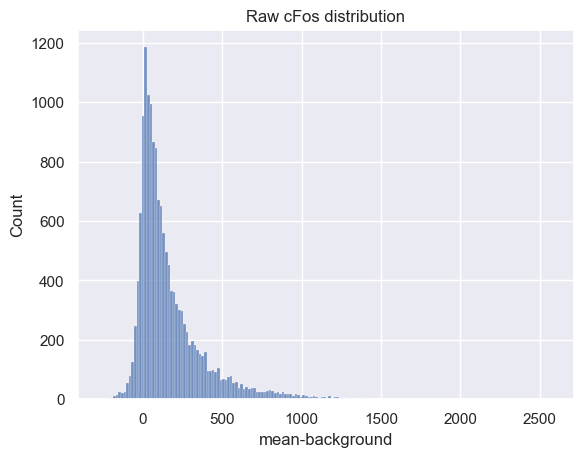

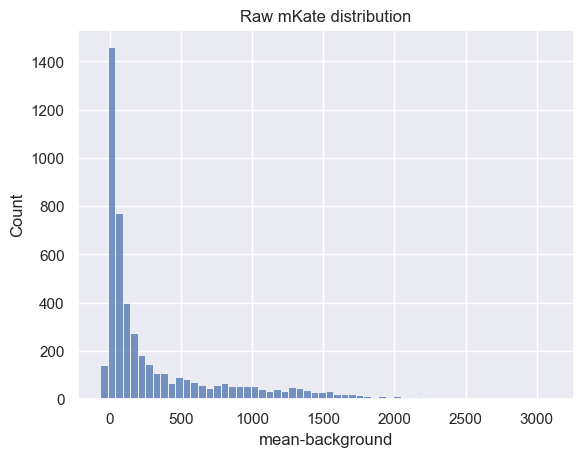

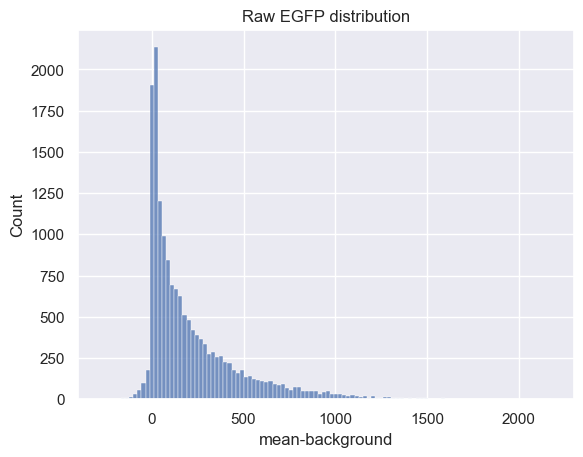

In [27]:
sns.set_theme()
q = df_full.query('stain == "cFos"')['mean-background']
sns.histplot(q)
plt.title('Raw cFos distribution')
plt.show()

q = df_full.query('stain == "mKate"')['mean-background']
sns.histplot(q)
plt.title('Raw mKate distribution')
plt.show()

q = df_full.query('stain == "EGFP"')['mean-background']
sns.histplot(q)
plt.title('Raw EGFP distribution')
plt.show()


266.23900000000003
65.0522
279.3263999999999


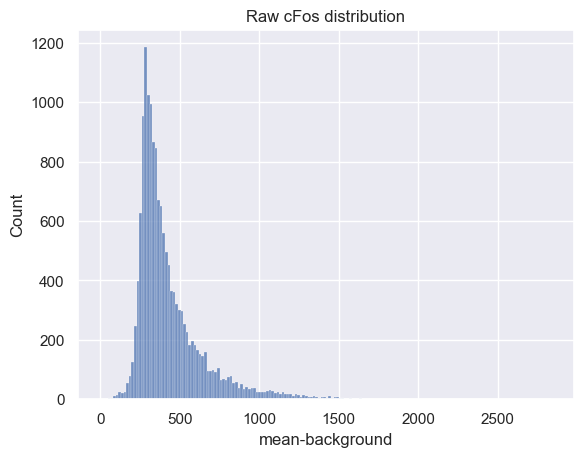

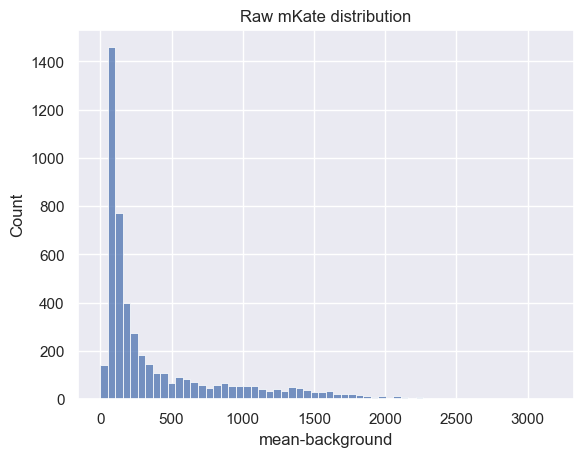

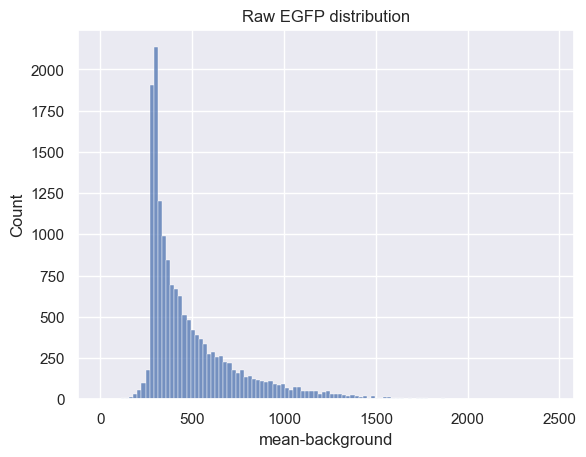

In [32]:
cFos_min = abs(df_full.query('stain == "cFos"')['mean-background'].min())
mKate_min = abs(df_full.query('stain == "mKate"')['mean-background'].min())
EGFP_min = abs(df_full.query('stain == "EGFP"')['mean-background'].min())
print(cFos_min)
print(mKate_min)
print(EGFP_min)

def adjust_intensity(x):
    if x.stain == "cFos":
        return x['mean-background'] + cFos_min
    elif x.stain == "mKate":
        return x['mean-background'] + mKate_min
    elif x.stain == "EGFP":
        return x['mean-background'] + EGFP_min
    else:
        print('missing val')
        return np.nan

df_full_adjusted = df_full.copy(deep=True)
df_full_adjusted['mean-background'] = df_full.apply(adjust_intensity, axis=1)

sns.set_theme()
q = df_full_adjusted.query('stain == "cFos"')['mean-background']
sns.histplot(q)
plt.title('Raw cFos distribution')
plt.show()

q = df_full_adjusted.query('stain == "mKate"')['mean-background']
sns.histplot(q)
plt.title('Raw mKate distribution')
plt.show()

q = df_full_adjusted.query('stain == "EGFP"')['mean-background']
sns.histplot(q)
plt.title('Raw EGFP distribution')
plt.show()


In [34]:
def get_norm_single(stain_x):
    q = f'dummy_{stain_x} == True and stain == "{stain_x}"'
    df_q = df_full_adjusted.query(q).copy()
    norm_condition = df_q.query('dox == "OFF_DOX" and react == "FR1" and treatment == "VEH"')['mean-background'].mean()
    df_q['norm_mean-background'] = df_q['mean-background'] / norm_condition
    print(f'{stain_x}')
    print(df_q.groupby(['dox', 'treatment', 'react'])['norm_mean-background'].mean(), '\n')

    df_q = df_q.rename(columns={'treatment': 'treat'})
    df_q['treatment'] = df_q[['dox', 'treat', 'react']].agg('_'.join, axis=1)
    prism_reorg(df_q).to_csv(f'RAM-12,13,14_norm_{stain_x}_PRISM.csv')

get_norm_single('cFos')
get_norm_single('mKate')
get_norm_single('EGFP')

cFos
dox      treatment  react
OFF_DOX  ABC        FR1      1.090084
                    NR       1.175240
                    VR5      1.235612
         VEH        FR1      1.000000
                    NR       1.175625
                    VR5      1.025758
ON_DOX   ABC        NR       1.309179
                    VR5      1.197861
         VEH        FR1      1.208385
                    NR       1.002956
                    VR5      1.049382
Name: norm_mean-background, dtype: float64 

mKate
dox      treatment  react
OFF_DOX  ABC        FR1      1.165839
                    NR       1.614263
                    VR5      0.409428
         VEH        FR1      1.000000
                    NR       0.662931
                    VR5      0.844836
ON_DOX   ABC        NR       0.170929
                    VR5      0.203056
         VEH        FR1      0.860844
                    NR       0.224123
                    VR5      0.225392
Name: norm_mean-background, dtype: float64 

EGFP
dox   

In [35]:
def get_norm_dbl(stain_x, stain_y):
    q = f'dummy_{stain_x} == True and dummy_{stain_y} == True and stain == "{stain_x}"'
    df_q = df_full_adjusted.query(q).copy()
    norm_condition = df_q.query('dox == "OFF_DOX" and react == "FR1" and treatment == "VEH"')['mean-background'].mean()
    df_q['norm_mean-background'] = df_q['mean-background'] / norm_condition
    print(f'{stain_x}, {stain_y:>7}')
    print(df_q.groupby(['dox', 'treatment', 'react'])['norm_mean-background'].mean(),'\n')

    df_q = df_q.rename(columns={'treatment': 'treat'})
    df_q['treatment'] = df_q[['dox', 'treat', 'react']].agg('_'.join, axis=1)
    prism_reorg(df_q).to_csv(f'RAM-12,13,14_norm_{stain_x}_coloc_w_{stain_y}_PRISM.csv')

import itertools
for x, y in itertools.permutations(['cFos', 'mKate', 'EGFP'], 2):
    get_norm_dbl(x, y)

cFos,   mKate
dox      treatment  react
OFF_DOX  ABC        FR1      1.123094
                    NR       1.273853
                    VR5      0.996813
         VEH        FR1      1.000000
                    NR       1.129764
                    VR5      1.115961
ON_DOX   ABC        NR       1.397992
                    VR5      1.251894
         VEH        FR1      1.358264
                    NR       0.915444
                    VR5      0.891456
Name: norm_mean-background, dtype: float64 

cFos,    EGFP
dox      treatment  react
OFF_DOX  ABC        FR1      1.148416
                    NR       1.107811
                    VR5      1.156583
         VEH        FR1      1.000000
                    NR       1.183389
                    VR5      1.125940
ON_DOX   ABC        NR       1.466713
                    VR5      1.176691
         VEH        FR1      1.246679
                    NR       1.001294
                    VR5      1.049090
Name: norm_mean-background, dtype: floa

In [36]:
def get_norm_trpl(stain_x):
    q = f'dummy_cFos == True and dummy_EGFP == True and dummy_mKate == True and stain == "{stain_x}"'
    df_q = df_full_adjusted.query(q).copy()
    norm_condition = df_q.query('dox == "OFF_DOX" and react == "FR1" and treatment == "VEH"')['mean-background'].mean()
    df_q['norm_mean-background'] = df_q['mean-background'] / norm_condition
    print(f'{stain_x}')
    print(df_q.groupby(['dox', 'treatment', 'react'])['norm_mean-background'].mean(),'\n')

    df_q = df_q.rename(columns={'treatment': 'treat'})
    df_q['treatment'] = df_q[['dox', 'treat', 'react']].agg('_'.join, axis=1)
    prism_reorg(df_q).to_csv(f'RAM-12,13,14_norm_triple_{stain_x}_PRISM.csv')

for stain in ['cFos', 'EGFP', 'mKate']:
    get_norm_trpl(stain)

cFos
dox      treatment  react
OFF_DOX  ABC        FR1      1.185334
                    NR       1.302693
                    VR5      0.982747
         VEH        FR1      1.000000
                    NR       1.218436
                    VR5      1.186517
ON_DOX   ABC        NR       0.663465
                    VR5      1.322815
         VEH        FR1      1.318087
                    NR       0.948878
                    VR5      0.868854
Name: norm_mean-background, dtype: float64 

EGFP
dox      treatment  react
OFF_DOX  ABC        FR1      1.326255
                    NR       1.201421
                    VR5      1.790257
         VEH        FR1      1.000000
                    NR       1.443232
                    VR5      1.255362
ON_DOX   ABC        NR       0.750941
                    VR5      0.967215
         VEH        FR1      0.915669
                    NR       2.472638
                    VR5      2.425739
Name: norm_mean-background, dtype: float64 

mKate
dox   